In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

otake jp
saint george bm
chuy uy
pinega ru
hobart au
ushuaia ar
busselton au
waitati nz
tuatapere nz
carnarvon au
longyearbyen sj
talnakh ru
ossora ru
mataura pf
ushuaia ar
saskylakh ru
lagoa pt
kuche cn
mataura pf
vaini to
amderma ru
pavilosta lv
iqaluit ca
hanmer springs nz
husavik is
kaohsiung tw
new norfolk au
mithimna gr
rikitea pf
ushuaia ar
barrow us
rikitea pf
vaini to
rikitea pf
cabo san lucas mx
yellowknife ca
hobyo so
rikitea pf
xinqing cn
ponta do sol cv
mayo ca
vaini to
norman wells ca
bredasdorp za
severo-kurilsk ru
coulihaut dm
kodiak us
rikitea pf
hermanus za
chum phae th
bluff nz
vaini to
barentsburg sj
hualmay pe
ejura gh
muros es
port alfred za
ushuaia ar
puerto ayora ec
puerto ayora ec
caravelas br
mar del plata ar
mandurah au
upernavik gl
avarua ck
kodiak us
atuona pf
hihifo to
alofi nu
saint george bm
mar del plata ar
souillac mu
punta arenas cl
bridlington gb
terrace ca
tumbagaan ph
busselton au
punta arenas cl
karratha au
opuwo na
humaita py
jijiang cn
kumano jp

hermanus za
punta arenas cl
busselton au
punta arenas cl
bluff nz
bluff nz
moissala td
hobart au
kodiak us
corsicana us
hailun cn
busselton au
bethel us
central point us
yellowknife ca
gondanglegi id
mar del plata ar
santiago br
duz tn
ushuaia ar
cape town za
zapolyarnyy ru
natal br
bambous virieux mu
vila do maio cv
esperance au
constitucion cl
carlsbad us
butaritari ki
arman ru
beringovskiy ru
baruun-urt mn
hithadhoo mv
rikitea pf
bambous virieux mu
saint-philippe re
rikitea pf
oxelosund se
hirara jp
belushya guba ru
lima pe
sitka us
yulara au
sal rei cv
puerto ayora ec
albany au
pangai to
saint-augustin ca
rikitea pf
longyearbyen sj
ambilobe mg
bosaso so
esmeralda cu
nikolskoye ru
albany au
avera pf
vanimo pg
canatlan mx
chuy uy
hermanus za
longyearbyen sj
vardo no
kyshtovka ru
baturaja id
taungdwingyi mm
taolanaro mg
tomatlan mx
husavik is
wenling cn
homer us
berezovyy ru
praya id
ushuaia ar
meulaboh id
lakhdenpokhya ru
bredasdorp za
pochutla mx
albany au
cidreira br
sinop tr
kilco

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

ed4d6b85637f097f23bc5d112acbaa2d

In [12]:
import requests
requests.__version__

'2.23.0'

In [13]:
# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | otake
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | pinega
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | waitati
Processing Record 9 of Set 1 | tuatapere
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | ossora
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | kuche
City not found. Skipping...
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | pavilosta
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | hanmer springs


Processing Record 35 of Set 4 | mutare
Processing Record 36 of Set 4 | evensk
Processing Record 37 of Set 4 | karamea
City not found. Skipping...
Processing Record 38 of Set 4 | mungaoli
Processing Record 39 of Set 4 | dongkan
Processing Record 40 of Set 4 | kilindoni
Processing Record 41 of Set 4 | tokur
Processing Record 42 of Set 4 | camacari
Processing Record 43 of Set 4 | kargil
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | abu samrah
Processing Record 46 of Set 4 | sept-iles
Processing Record 47 of Set 4 | carbonia
Processing Record 48 of Set 4 | ocampo
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | kadyy
Processing Record 1 of Set 5 | kui buri
Processing Record 2 of Set 5 | jumla
Processing Record 3 of Set 5 | calategas
City not found. Skipping...
Processing Record 4 of Set 5 | karauzyak
City not found. Skipping...
Processing Record 5 of Set 5 | kenai
Processing Record 6 of Set 5 | maues
Processing Record 7 of Set 5 | pasni

Processing Record 19 of Set 8 | baruun-urt
Processing Record 20 of Set 8 | oxelosund
Processing Record 21 of Set 8 | hirara
Processing Record 22 of Set 8 | lima
Processing Record 23 of Set 8 | yulara
Processing Record 24 of Set 8 | sal rei
Processing Record 25 of Set 8 | pangai
Processing Record 26 of Set 8 | saint-augustin
Processing Record 27 of Set 8 | ambilobe
Processing Record 28 of Set 8 | bosaso
Processing Record 29 of Set 8 | esmeralda
Processing Record 30 of Set 8 | avera
Processing Record 31 of Set 8 | canatlan
Processing Record 32 of Set 8 | kyshtovka
Processing Record 33 of Set 8 | baturaja
Processing Record 34 of Set 8 | taungdwingyi
Processing Record 35 of Set 8 | tomatlan
Processing Record 36 of Set 8 | homer
Processing Record 37 of Set 8 | berezovyy
Processing Record 38 of Set 8 | praya
Processing Record 39 of Set 8 | meulaboh
Processing Record 40 of Set 8 | lakhdenpokhya
Processing Record 41 of Set 8 | pochutla
Processing Record 42 of Set 8 | sinop
Processing Record 43

Processing Record 6 of Set 12 | tawkar
City not found. Skipping...
Processing Record 7 of Set 12 | manaus
Processing Record 8 of Set 12 | chabahar
Processing Record 9 of Set 12 | severodvinsk
Processing Record 10 of Set 12 | pangnirtung
Processing Record 11 of Set 12 | agropoli
Processing Record 12 of Set 12 | ukiah
Processing Record 13 of Set 12 | halifax
Processing Record 14 of Set 12 | huesca
Processing Record 15 of Set 12 | bac lieu
Processing Record 16 of Set 12 | bure
Processing Record 17 of Set 12 | lazaro cardenas
Processing Record 18 of Set 12 | ugoofaaru
Processing Record 19 of Set 12 | high level
Processing Record 20 of Set 12 | limon
Processing Record 21 of Set 12 | ndele
Processing Record 22 of Set 12 | usvyaty
Processing Record 23 of Set 12 | phan rang
City not found. Skipping...
Processing Record 24 of Set 12 | cayenne
Processing Record 25 of Set 12 | atar
Processing Record 26 of Set 12 | nestorion
City not found. Skipping...
Processing Record 27 of Set 12 | viedma
Proce

In [18]:
len(city_data)

581

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Otake,34.20,132.22,80.60,74,75,10.29,JP,2020-06-14 01:58:44
1,Saint George,37.10,-113.58,89.60,4,1,26.40,US,2020-06-14 01:54:02
2,Chuy,-33.70,-53.46,43.00,66,1,10.51,UY,2020-06-14 01:58:44
3,Pinega,64.70,43.39,53.46,62,64,7.05,RU,2020-06-14 01:58:45
4,Hobart,-42.88,147.33,57.20,50,100,16.11,AU,2020-06-14 01:56:00
5,Ushuaia,-54.80,-68.30,32.00,91,20,4.70,AR,2020-06-14 01:58:45
6,Busselton,-33.65,115.33,63.00,73,75,12.21,AU,2020-06-14 01:58:45
7,Waitati,-45.75,170.57,51.01,50,0,10.00,NZ,2020-06-14 01:58:45
8,Tuatapere,-46.13,167.68,48.00,71,0,3.00,NZ,2020-06-14 01:58:46
9,Carnarvon,-24.87,113.63,65.53,38,0,20.33,AU,2020-06-14 01:53:58


In [21]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        581 non-null    object 
 1   Lat         581 non-null    float64
 2   Lng         581 non-null    float64
 3   Max Temp    581 non-null    float64
 4   Humidity    581 non-null    int64  
 5   Cloudiness  581 non-null    int64  
 6   Wind Speed  581 non-null    float64
 7   Country     581 non-null    object 
 8   Date        581 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 41.0+ KB


In [24]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Otake,JP,2020-06-14 01:58:44,34.20,132.22,80.60,74,75,10.29
1,Saint George,US,2020-06-14 01:54:02,37.10,-113.58,89.60,4,1,26.40
2,Chuy,UY,2020-06-14 01:58:44,-33.70,-53.46,43.00,66,1,10.51
3,Pinega,RU,2020-06-14 01:58:45,64.70,43.39,53.46,62,64,7.05
4,Hobart,AU,2020-06-14 01:56:00,-42.88,147.33,57.20,50,100,16.11
...,...,...,...,...,...,...,...,...,...
576,Byron Bay,AU,2020-06-14 02:01:06,-28.65,153.62,71.60,83,90,11.41
577,Amapa,BR,2020-06-14 02:01:06,1.00,-52.00,72.39,98,100,1.57
578,Buraydah,SA,2020-06-14 02:01:07,26.33,43.98,82.40,21,26,6.93
579,Uray,RU,2020-06-14 02:01:07,60.12,64.78,45.93,65,90,11.07


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

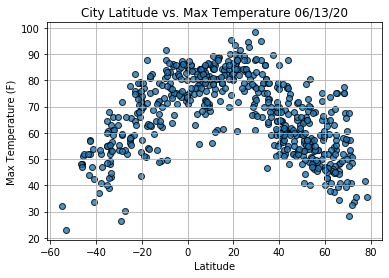

In [31]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

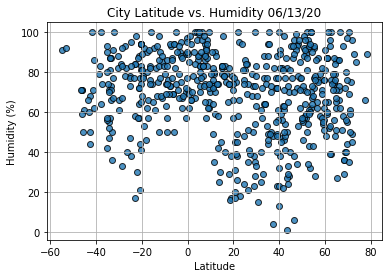

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

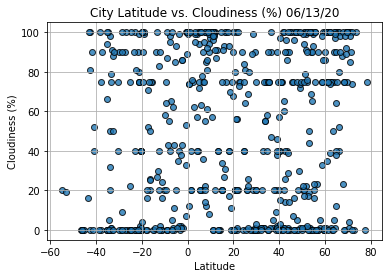

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

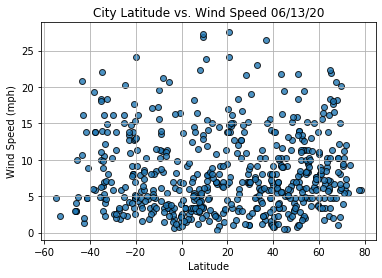

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()